<a href="https://colab.research.google.com/github/davidgiraldo30/environment/blob/master/avance_dim_red_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning II
# Dimensionality Reduction

#### David Alejandro Giraldo Montoya
#### CC 1020451546

In [9]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import numpy as np
from PIL import Image
import os

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/faces')

In [13]:
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/faces'

# Workshop I

## 1. Simulate any random rectangular matrix A.

In [14]:
rows= 3
cols= 3

# Square matrix for determinate calculus purposes

A= np.random.rand(rows, cols)
print(A)


[[0.7937495  0.47820754 0.72541805]
 [0.38038445 0.21925338 0.43074992]
 [0.3297429  0.69384816 0.64219097]]


In [15]:
A.shape

(3, 3)

### - What is the rank and trace of A?

In [16]:
rank = np.linalg.matrix_rank(A)
print(f'The Rank for matrix A is: {rank}')
#The rank of a matrix is its min number of columns or rows, which gives the maximum number of linearly independent rows or columns. 

trace = np.trace(A)
print(f'the Trace for matrix A is: {trace}')
# Calculation of eigenvalues: The trace of a matrix is closely related to its eigenvalues. The sum of the eigenvalues of a matrix equals its trace. 
# It is useful, among others, to calculate the determinant of the matrix.

The Rank for matrix A is: 3
the Trace for matrix A is: 1.6551938415480116


### - What is the determinant of A?

In [17]:
determinant= np.linalg.det(A)
print(determinant)

-0.03535004274569328


### - Can you invert A? How?

In [18]:
inverse= np.linalg.inv(A)
print(inverse)

[[ 4.47163539 -5.55103752 -1.32779199]
 [ 2.89229433 -7.65309696  1.866187  ]
 [-5.42097804 11.11897056  0.22264338]]


In [19]:
dot1= np.dot(A, inverse)
print(np.round(dot1, 2))

dot2= np.dot(inverse, A)
print(np.round(dot2, 2))


[[ 1.  0.  0.]
 [ 0.  1. -0.]
 [-0. -0.  1.]]
[[ 1. -0.  0.]
 [ 0.  1.  0.]
 [ 0. -0.  1.]]


In [20]:
eighValues, eighVec= np.linalg.eig(dot1)

print(f'eighValues: {eighValues} \n ---- eighVec: {eighVec}')

eighValues: [1. 1. 1.] 
 ---- eighVec: [[ 0.91536528 -0.83644128 -0.06290914]
 [-0.33528495 -0.45639339 -0.08559278]
 [ 0.22291347  0.30343215  0.99434215]]


In [21]:
eighValues, eighVec= np.linalg.eig(dot2)

print(f'eighValues {eighValues} \n eighVec {eighVec}')

eighValues [1. 1. 1.] 
 eighVec [[ 0.60374987 -0.63211101  0.23271376]
 [-0.12977172 -0.12614216 -0.97120616]
 [-0.78654014 -0.76454157  0.05101865]]


In theory AA′=IyA′A=I should be equal nevertheless in the practice, computational operations, go to a maximum detail and results, for elements outside of the diagonal, difer to the expected zero. Results still can be used considering the limit or the approximation.

## 2. Add a steady, well-centered picture of your face to a shared folder alongside your classmates.

In [22]:
images_folder= os.listdir('.')
print(images_folder)

['Lina Martinez.jpeg', 'Jose Alejandro Llano.jpeg', 'Daniel V.jpeg', 'DanielaAguiarV.jpg', 'AlejandroC.jpeg', 'DavidG.jpg', 'JD.jpg', 'JoseAlcocer.jpg', 'JuanPabloM.png', 'Robinson_Alvarez.jpeg', 'JuanCh.png', 'JorgeMorales.jpg', 'Santiago M.jpeg', 'SantiagoRG.jpeg', 'Laura.jpeg', 'MariaMartinez.jpg', 'ManuelaPiedrahita.jpeg', 'Carolina Bareño.jpg', 'Daniela Hernandez.jpeg', 'VanessaLopera.jpg', 'David Zapata.jpeg', 'mauriciosierrav.png', 'walter.jpeg', 'Carlos Andrés Sepúlveda Calle.jpeg', 'MiltonBenavides.jpg', 'JorgeMorales.jpeg']


### - Edit your picture to be 256x256 pixels, grayscale (single channel)

In [23]:
faces = [Image.open(os.path.join('.', i)) for i in images_folder]
size= (256, 256)

faces= [face.resize(size) for face in faces]
faces= [face.convert('L') for face in faces]


###- Plot your edited face

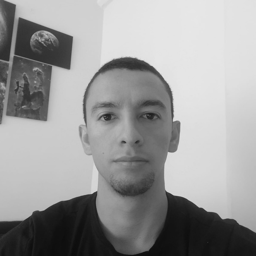

In [24]:
my_face = Image.open(os.path.join('.', 'DavidG.jpg'))
my_face= my_face.resize(size)
my_face= my_face.convert('L')

my_face.show()



### - Calculate and plot the average face of the cohort.

In [25]:
faces_array= [np.array(face) for face in faces]
faces_array_mean= np.mean(faces_array, axis=0)
faces_mean= Image.fromarray(faces_array_mean)

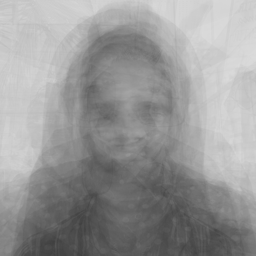

In [26]:
faces_mean.show()

### - How distant is your face from the average? How would you measure it?

In [27]:


distance = faces_array_mean - my_face
print(distance)

[[109.26923077 114.15384615 114.5        ... -19.53846154 -19.19230769
  -20.23076923]
 [107.         109.73076923 112.15384615 ... -19.15384615 -21.30769231
  -21.19230769]
 [106.34615385 114.65384615 117.53846154 ... -18.26923077 -18.57692308
  -17.5       ]
 ...
 [100.84615385 107.15384615 108.53846154 ...  91.15384615  91.03846154
   90.15384615]
 [100.46153846 104.30769231 109.57692308 ...  94.80769231  94.53846154
   96.11538462]
 [ 99.5        105.80769231 110.46153846 ...  94.73076923  94.88461538
   96.19230769]]


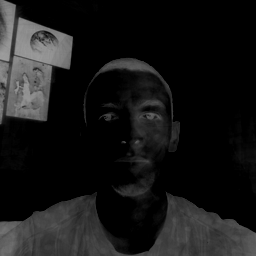

In [28]:
distance_image = Image.fromarray(distance)
distance_image.show()

I chose to measure how distant my picture is from the average with the rest of both images with the euclidean distance. From the aboce result I conclude that my face is something as similar to the others, except by my left eye, maybe because of the picture's position, and except by my hair. As my wall has some images, it is appreciated in the difference of both pictures.

## 3. Let’s create the unsupervised Python package


In [71]:
import os

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
os.chdir('/content/drive/MyDrive/environment')

In [32]:
from pack.libraries import SVD

## 4. Apply SVD over the picture of your face, progressively increasing the number of singular values used. Is there any point where you can say the image is appropriately reproduced? How would you quantify how different your photo and the approximation are?

In [33]:
import numpy as np

In [50]:
U, S, V = np.linalg.svd(my_face)
k=40

imageTransformSVD= U[:, :k] @ np.diag(S[:k]) @V[:k,:]

Al usar K=40 parece ser que mi imagen es correctamente reproducida

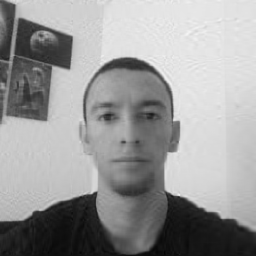

In [51]:
image_SVD_David=Image.fromarray(imageTransformSVD)

image_SVD_David.show()

## 5. Train a naive logistic regression on raw MNIST images to distinguish between 0s and 8s. We are calling this our baseline. What can you tell about the baseline performance?

In [36]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')
X = mnist.data
y = mnist.target.astype(np.int)
X_filtered = X[(y == 0) | (y == 8)]
y_filtered = y[(y == 0) | (y == 8)]

split = 6000  # Usamos las primeras 6000 imágenes para entrenamiento
X_train, X_test = X_filtered[:split], X_filtered[split:]
y_train, y_test = y_filtered[:split], y_filtered[split:]

model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
<ipython-input-36-bd59fcef6ad0>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = mnist.targe

Accuracy: 0.9853778467908902


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')
X = mnist.data
y = mnist.target.astype(np.int)
X_filtered = X[(y == 0) | (y == 8)]
y_filtered = y[(y == 0) | (y == 8)]

split = 6000  # Usamos las primeras 6000 imágenes para entrenamiento
X_train, X_test = X_filtered[:split], X_filtered[split:]
y_train, y_test = y_filtered[:split], y_filtered[split:]

model = LogisticRegression(random_state=0, max_iter=10000)
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
<ipython-input-37-8d34d6bb613c>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = mnist.targe

Accuracy: 0.9853778467908902


El modelo no tuvo resultados ejecutándolo en su modelo base porque alcanzó el número máximo de iteraciones. Se estableció un número máximo de iteraciones en 10 mil y con esto el modelo entregó una precisión de 98.5%.

## 6. Now, apply dimensionality reduction using all your algorithms to train the model with only 2 features per image.



In [52]:
os.chdir('/content/drive/MyDrive/environment')

In [55]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], -1)
x_test= x_test.reshape(x_test.shape[0],-1)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [75]:
import numpy as np
from pack.libraries import PCA


In [66]:
# Fit my PCA built from scratch

pcaT= PCA.PCA(n_components=2)
pcaT.fit(x_train)
x_train_pca=pcaT.transform(x_train)
x_test_pca=pcaT.transform(x_test)

In [69]:
# Fit my TSNE built from scratch. Not working.

tsneT = tsne(n_components=2)
tsneT.fit(x_train)
x_train_TSNE = tsneT.transform(x_train)
x_test_TSNE = tsneT.fit_transform(x_test)

TypeError: ignored

In [58]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(max_iter=1000)
logreg.fit(x_train_pca, y_train)


LogisticRegression(max_iter=1000)

In [60]:
score = logreg.score(x_test_pca, y_test)
print('Precisión de la regresión logística: {:.2f}'.format(score))

Precisión de la regresión logística: 0.34


##- Plot the 2 new features generated by your algorithm

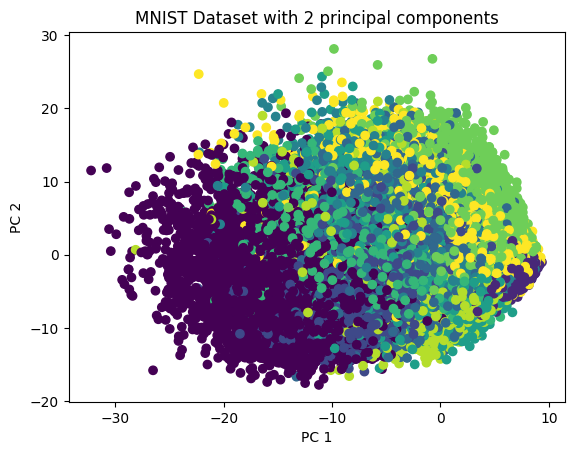

In [61]:
import matplotlib.pyplot as plt

plt.scatter(x_train_pca[:,0], x_train_pca[:,1], c=y_train)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('MNIST Dataset with 2 principal components')
plt.show()

##- Does this somehow impact the performance of your model?

#### El resultado después de haber aplicado PCA con mi algoritmo al parecer es una disminución en la precisión. Posiblemente 2 componentes no sea la mejor elección para realizar la estimación.

## 7. Repeat the process above but now using the built-in algorithms in the Scikit-Learn library. How different are these results from those of your implementation? Why?

In [79]:
from sklearn.decomposition import PCA as pca_sk

In [80]:
# fit with PCA from sklearn

pca_sk = pca_sk(n_components=2)
x_train_pca_sk = pca_sk.fit_transform(x_train)
x_test_pca_sk = pca_sk.transform(x_test)



In [83]:
from sklearn.linear_model import LogisticRegression
logreg_sk=LogisticRegression(max_iter=1000)
logreg_sk.fit(x_train_pca_sk, y_train)

LogisticRegression(max_iter=1000)

In [86]:
score_sk = logreg_sk.score(x_test_pca_sk, y_test)
print('Precisión de la regresión logística: {:.2f}'.format(score_sk))

Precisión de la regresión logística: 0.34


## 8. What strategies do you know (or can think of) in order to make PCA more robust? (Bonus points for implementing them)

PCA es bueno para reducir las dimensiones de una base de datos cuando hay poco ruido entre las observaciones. Sin embargo, algunos pocas observaciones pueden afectar el resultado, por lo que una alternativa para hacerlo más robusto es escalar los datos normalizandolos.

Al igual que reconfigurando la escala de los datos, otra opción es hacer un análisis de datos atípicos con su correspondiente remoción y de esta forma evitar que estos incidan sobre el resultado.

También es posible que los datos faltantes afecten las salidas de un PCA por lo que una alternativa es realizar imputación de datos. Sin embargo, en lo personal me parece una opción poco efectiva puesto que es alimentar el modelo con los mismos componentes, por lo que a mi consideración se terminaría haciendo un análisis de componentes principales sobre una base de datos que gira en torno a datos sesgados a la media (si es que esta fuera la técnica de imputación elegida y una de las más comunes).

Si la base de datos es muy grande en dimensión / número de variables, se puede aplicar feature selection o feature extraction antes de aplicar el PCA, de manera que perturbaciones en las variables elegidas no impacten el resultado del análisis y por lo tanto el PCA sea más robusto.

## 9. What are the underlying mathematical principles behind UMAP? What is it useful for?

UMAP (Uniform Manifold Approximation and Projection). Es una técnica de reducción de dimensionalidad utilizada para datos de alta dimensionalidad. Los principios en los que se basa incluyen:

Representación topológica: UMAP procura preservar la estructura de los datos de tal forma que su representación gráfica permanezca aún después de efectuada la reducción.

Conjuntos de datos borrosos: El método construye conjuntos de datos y permite incorporar ruido de ellos, por lo que UMAP es robusto frente a bases de datos con ruido.

Marco de optimización: La reducción de dimensionalidad se realiza como una tarea de optimización, donde el objetivo es minimizar la entropía cruzada entre el ocnjunto de datos borrosos de la data original y la data construida con la optimización. Esto permite que se haga la reducción que mejor preserve la estructura topológica de los datos.

Reducción no lineal: UMAP usa SGD descenso de gradiente estocástico para optimizar la reducción. Esto permite a UMAP generar reducciones no lineales que puede capturar patrones y relaciones complejos en los datos.

UMAP es útil en visualización de datos, EDA, clustering, detección de anomalías, entre otros. Es particularmente útil para visualizar data de alta dimensionalidad en espacios de pocas dimensiones, lo que puede ayudar a descubrir patrones, relaciones y estructuras que pueden no se aparentes en la estructura de datos original.

## 10. What are the underlying mathematical principles behind LDA? What is it useful for?

Linear Discriminant Analysis (LDA) es un método estadístico usado para reducción de dimensionalidad. Entre sus principios matemáticos subyacentes están:

Transformaciones lineales: LDA usa transformaciones lineales para proyectar datos de altas dimensiones en espacios de menor dimensión. La idea es encontrar un conjunto de funciones que puedan separar óptimamente puntos entre diferentes clases, por lo que también es usado en tareas de clasificación.

Análisis de distriminación: El método busca generar funciones que ayuden a distinguir clases dentro de la base de datos. Procura minimizar la dispersión al interior de cada clase por lo que es un método de aprendizaje supervisado.

Distribución normal multivariada: LDA asume que los datos de cada clase siguen una distribución normal multivariada para estimar los parámetros de la distribución, como los vectores de medias y matrices de covarianzas usados en las funciones de discriminación.

Descomposición del Eigenvalue: Usa esta descomposición para encontrar las funciones discriminantes. Se hace para determinar la separación más óptima entre clases.

Teorema de Bayes: Es usado para validar la probabilidad de pertenencia a determinada clase dados los datos observados. Con estas probabilidades también se calcula las funciones de discriminación lineal.

LDA es útil para reducción de dimensionalidad y clasificación. Se puede usar para feature extraction. Se usa comúnmente en reconocimiento de imágenes, bioinformática, entre otros.